# Hyperparameters optimization for Logistic Regression

In [1]:
import pandas as pd

DATA = "../data/customers_clustered.csv"

df_clustered = pd.read_csv(DATA)
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [2]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

In [3]:
X = df_clustered.drop("Response", axis=1)
y = df_clustered["Response"]

In [4]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [5]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [6]:
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
    "cluster"
]

standard_cols = [
    "Income",
    "Age",
]

power_cols = X.columns[
   X.columns.str.startswith("Mnt") | X.columns.str.startswith("Num")
].tolist()

minmax_cols = [
    col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols
]

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

**ALUNOS**: Explicar que está primeiro reproduzindo o modelo sem otimização de hiperparâmetros. Explicar as curvas obtidas.

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline  # atenção para o Pipeline do ImbLearn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

pipeline_logreg = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
        ("rus", RandomUnderSampler(random_state=RANDOM_STATE)),
        ("model", LogisticRegression(random_state=RANDOM_STATE))
    ]
)

pipeline_logreg.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [8]:
len(pipeline_logreg[:-3].get_feature_names_out())

65

In [9]:
pipeline_logreg[:-1].get_feature_names_out()

array(['one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp1_0', 'one-hot__AcceptedCmp1_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__AcceptedCmpTotal_0', 'one-hot__AcceptedCmpTotal_3'],
      dtype=object)

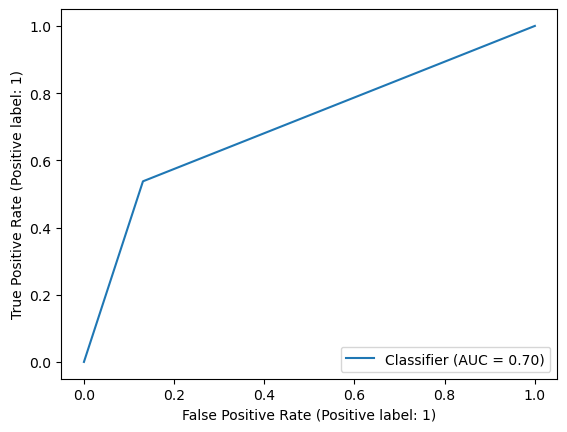

In [10]:
# ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

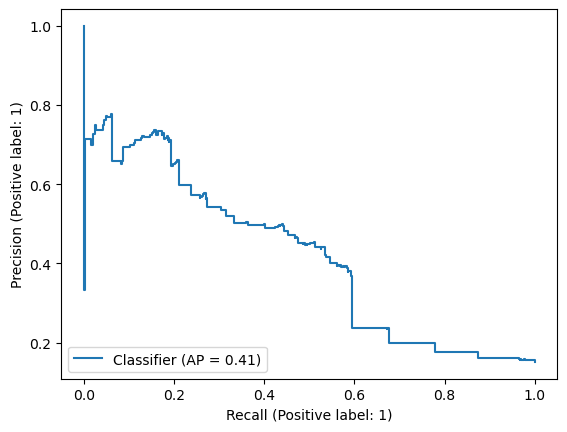

In [11]:
# Precision-Recall
from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1, method="decision_function")

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)

In [12]:
pipeline_logreg.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Kidhome',
                                   'Teenhome', 'YearsSinceEnrolled', 'Children',
                                   'AcceptedCmpTotal', 'cluster']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                             

In [13]:
import numpy as np

np.logspace(-7, 7, 7)

array([1.00000000e-07, 2.15443469e-05, 4.64158883e-03, 1.00000000e+00,
       2.15443469e+02, 4.64158883e+04, 1.00000000e+07])

**ALUNOS**: Explicar o procedimento de GridSearchCV e falar brevemente dos parâmetros escolhidos para estudo.

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "feature_selection__k": [10, 15, 20, 25],
    "model__C": np.logspace(-3, 3, 7),
    "model__solver": ["liblinear", "lbfgs", "saga"],
    "model__penalty": ["l1", "l2", "elasticnet", "none"],
}

grid_search = GridSearchCV(
    pipeline_logreg,
    param_grid,
    scoring=["roc_auc", "average_precision", "accuracy"],
    n_jobs=-1,
    refit="average_precision"
)

In [15]:
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [16]:
import warnings

warnings.filterwarnings("ignore")

In [17]:
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

**ALUNOS**: Explicar a estrutura do objeto `grid_search`. E mostrar como obter os resultados.

In [18]:
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [19]:
grid_search.best_score_

0.5857418098239213

In [20]:
print(*grid_search.cv_results_.keys(), sep="\n")

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_feature_selection__k
param_model__C
param_model__penalty
param_model__solver
params
split0_test_roc_auc
split1_test_roc_auc
split2_test_roc_auc
split3_test_roc_auc
split4_test_roc_auc
mean_test_roc_auc
std_test_roc_auc
rank_test_roc_auc
split0_test_average_precision
split1_test_average_precision
split2_test_average_precision
split3_test_average_precision
split4_test_average_precision
mean_test_average_precision
std_test_average_precision
rank_test_average_precision
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy


In [21]:
np.nanmax(grid_search.cv_results_["mean_test_average_precision"])

0.5857418098239213

In [22]:
np.nanmax(grid_search.cv_results_["mean_test_roc_auc"])

0.8656658454607532

In [23]:
np.nanmax(grid_search.cv_results_["mean_test_accuracy"])

0.8489795918367348

In [24]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_average_precision"])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [25]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_roc_auc"])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [26]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_accuracy"])]

{'feature_selection__k': 10,
 'model__C': 0.001,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [27]:
df_results_gs = pd.DataFrame(
    {
        "auprc": grid_search.cv_results_["mean_test_average_precision"],
        "auroc": grid_search.cv_results_["mean_test_roc_auc"],
        "accuracy": grid_search.cv_results_["mean_test_accuracy"],
    }
)

df_results_gs

,auprc,auroc,accuracy
0,0.151020,0.500000,0.848980
1,NaN,NaN,NaN
2,0.151020,0.500000,0.848980
3,0.403915,0.722988,0.810884
4,0.403915,0.722988,0.810884
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,0.580802,0.864971,0.790930


<Axes: >

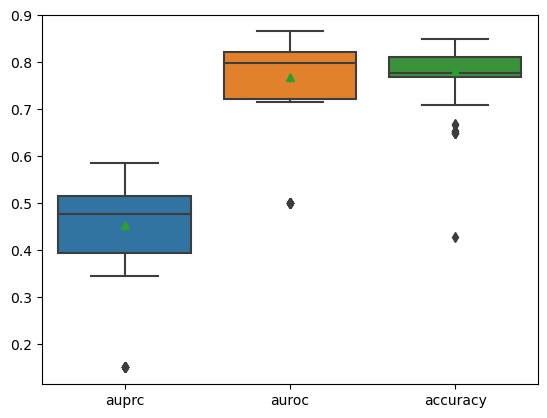

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(
    data=df_results_gs,
    showmeans=True
)

In [29]:
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

**ALUNOS**: Explicar que está fazendo o pipeline com os melhores parâmetros.

In [30]:
pipeline_logreg_best = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("feature_selection", SelectKBest(score_func=f_classif, k=grid_search.best_params_["feature_selection__k"])),
        ("rus", RandomUnderSampler(random_state=RANDOM_STATE)),
        ("model", LogisticRegression(
            random_state=RANDOM_STATE,
            C=grid_search.best_params_["model__C"],
            penalty=grid_search.best_params_["model__penalty"],
            solver=grid_search.best_params_["model__solver"],
        ))
    ]
)

scores = cross_validate(
    pipeline_logreg_best,
    X,
    y,
    cv=skf,
    scoring=["accuracy", "precision", "recall", "roc_auc", "average_precision"],
    n_jobs=-1
)

In [31]:
pipeline_logreg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

In [32]:
scores

{'fit_time': array([0.0546    , 0.06218362, 0.05679774, 0.05690527, 0.06878018]),
 'score_time': array([0.02446413, 0.02713394, 0.02438068, 0.02510786, 0.02427626]),
 'test_accuracy': array([0.75963719, 0.7755102 , 0.78231293, 0.80498866, 0.75056689]),
 'test_precision': array([0.35338346, 0.37096774, 0.384     , 0.41935484, 0.35526316]),
 'test_recall': array([0.70149254, 0.68656716, 0.71641791, 0.78787879, 0.81818182]),
 'test_roc_auc': array([0.83165057, 0.83167052, 0.84019076, 0.89513131, 0.85387879]),
 'test_average_precision': array([0.57120364, 0.56859571, 0.52419412, 0.67153395, 0.56648324])}

In [33]:
scores["time"] = scores["fit_time"] + scores["score_time"]

scores

{'fit_time': array([0.0546    , 0.06218362, 0.05679774, 0.05690527, 0.06878018]),
 'score_time': array([0.02446413, 0.02713394, 0.02438068, 0.02510786, 0.02427626]),
 'test_accuracy': array([0.75963719, 0.7755102 , 0.78231293, 0.80498866, 0.75056689]),
 'test_precision': array([0.35338346, 0.37096774, 0.384     , 0.41935484, 0.35526316]),
 'test_recall': array([0.70149254, 0.68656716, 0.71641791, 0.78787879, 0.81818182]),
 'test_roc_auc': array([0.83165057, 0.83167052, 0.84019076, 0.89513131, 0.85387879]),
 'test_average_precision': array([0.57120364, 0.56859571, 0.52419412, 0.67153395, 0.56648324]),
 'time': array([0.07906413, 0.08931756, 0.08117843, 0.08201313, 0.09305644])}

In [34]:
df_scores_best = pd.DataFrame(scores)
df_scores_best

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,0.054600,0.024464,0.759637,0.353383,0.701493,0.831651,0.571204,0.079064
1,0.062184,0.027134,0.775510,0.370968,0.686567,0.831671,0.568596,0.089318
2,0.056798,0.024381,0.782313,0.384000,0.716418,0.840191,0.524194,0.081178
3,0.056905,0.025108,0.804989,0.419355,0.787879,0.895131,0.671534,0.082013
4,0.068780,0.024276,0.750567,0.355263,0.818182,0.853879,0.566483,0.093056


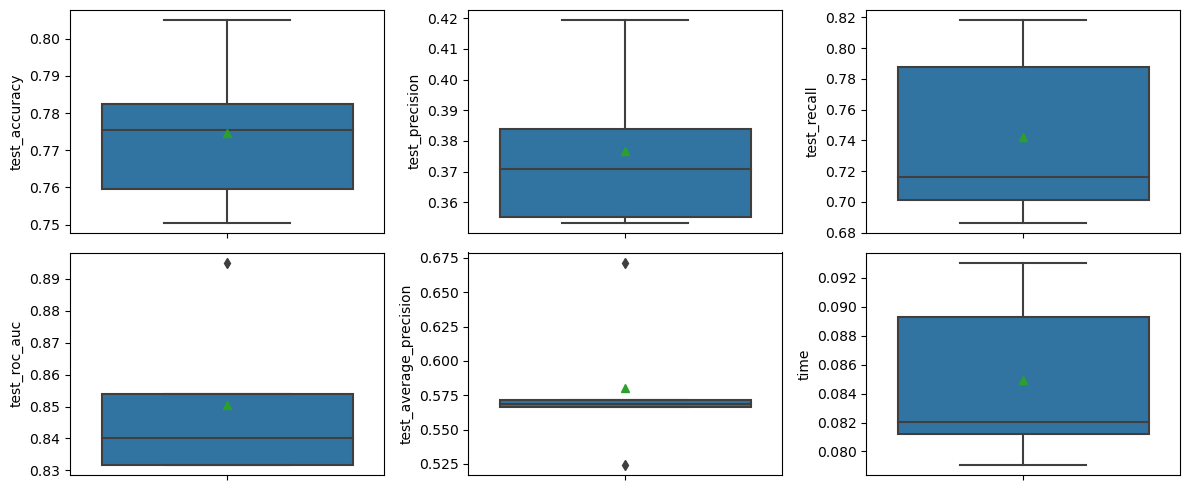

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 5), tight_layout=True)

cols = df_scores_best.columns[2:].to_list()

for ax, col in zip(axs.flatten(), cols):
    b = sns.boxplot(y=col, data=df_scores_best, ax=ax, showmeans=True)

plt.show()

In [36]:
pipeline_logreg_best.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

**ALUNOS**: Destacar que efetivamente foram selecionadas 25 features e mostrar suas importâncias.

In [37]:
names = pipeline_logreg_best[:-1].get_feature_names_out()
names

array(['one-hot__HasChildren_0', 'one-hot__HasChildren_1',
       'one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp1_0', 'one-hot__AcceptedCmp1_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp4_0', 'one-hot__AcceptedCmp4_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__Children_0', 'one-hot__AcceptedCmpTotal_0',
       'one-hot__AcceptedCmpTotal_1', 'one-hot__AcceptedCmpTotal_2',
       'one-hot__AcceptedCmpTotal_3', 'one-hot__cluster_0',
       'minmax__Recency', 'minmax__DaysSinceEnrolled', 'power__MntWines',
       'power__MntMeatProducts', 'power__NumCatalogPurchases',
       'power__MntTotal', 'power__MntRegularProds'], dtype=object)

In [38]:
len(names)

25

In [39]:
importance = pipeline_logreg_best["model"].coef_[0]
importance

array([ 0.38372803,  0.03810185, -0.80733667,  1.22916656, -0.1601319 ,
        0.58196178, -0.46594065,  0.88777053,  0.17604569,  0.2457842 ,
       -0.14481382,  0.56664371,  0.38372803, -0.80733667, -1.86580335,
       -0.98261247, -0.52200396, -0.75675512, -3.02266538,  3.76148746,
       -0.44092878,  1.33110151,  0.35340231,  0.6387897 , -1.47770579])

In [40]:
df_importance = pd.DataFrame(
    {
        "name": names,
        "importance": importance
    }
)

df_importance.sort_values(by="importance")

,name,importance
18,minmax__Recency,-3.022665
14,one-hot__AcceptedCmpTotal_1,-1.865803
24,power__MntRegularProds,-1.477706
15,one-hot__AcceptedCmpTotal_2,-0.982612
2,one-hot__HasAcceptedCmp_0,-0.807337
13,one-hot__AcceptedCmpTotal_0,-0.807337
17,one-hot__cluster_0,-0.756755
16,one-hot__AcceptedCmpTotal_3,-0.522004
6,one-hot__AcceptedCmp3_0,-0.465941
20,power__MntWines,-0.440929


**ALUNOS**: Destacar a melhora nas métricas exibidas nos gráficos.

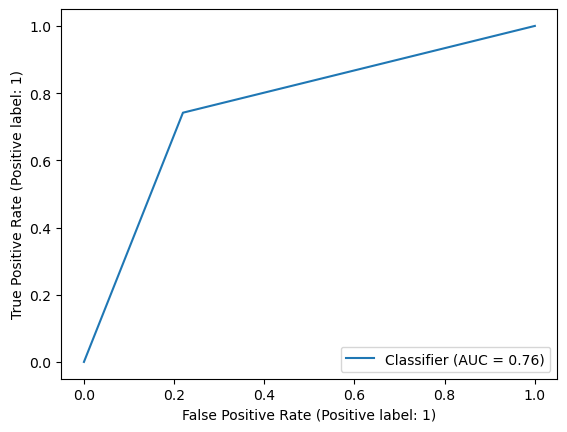

In [41]:
# ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

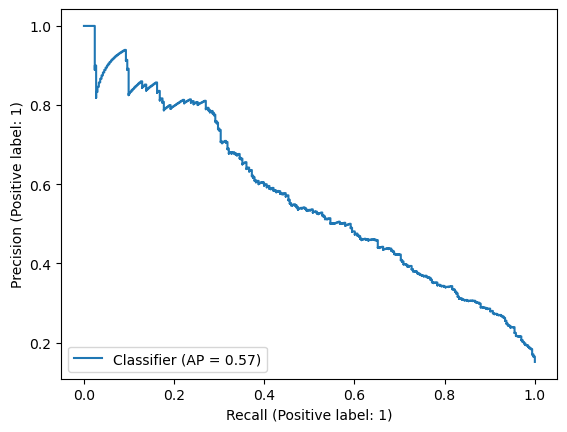

In [42]:
# Precision-Recall
from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1, method="decision_function")

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)